In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sc
import numpy.linalg as npl
from numpy.linalg import norm
import scipy.linalg as scl
from scipy.spatial.distance import pdist,squareform
import ase
from tqdm import tqdm_notebook as tqdm_cs

In [3]:
from tools import manipulation_hist,manipulation_LJ_force,manipulation_Harmonique_force,manipulation_LJ,get_numerical_force,manipulation_Harmonique
from tools import visualiser_trajectoire,faire_une_chaine_circulaire,faire_une_chaine_lineaire

+ add circles on the potential
+ more details on the positions to forces
+ external functions
+ put total forces formula
+ possibility to turn on/off pieces

# Developper les fonctions pour modeliser une chaine de polymere

## Potentiel harmonique

Le potentiel harmonique est donné par:

$V_{har}\,\left(d\right) = k \,\left(d-r_m\right)^2,$

où $d$ est la longueur du ressort, $r_m$ est la longueur du ressort au repos et $k$ est la constante de raideur du ressort.
Si les extrémités du ressort sont données par les vecteurs $\mathbf{r_1} = \left(x_1,\, y_1,\,  z_1\right)$ et $\mathbf{r_2} = \left(x_2,\, y_2,\,  z_2\right)$ respectivement, alors $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$.


In [4]:
def Potentiel_Harmonique(d,r_m,k):
    ### Retourne la valeur du potentiel harmonique
    return k*( d - r_m)**2

In [5]:
manipulation_Harmonique(Potentiel_Harmonique)

interactive(children=(FloatSlider(value=2.0, description='\\(r_m\\)', max=5.0, min=0.5, step=0.2), FloatSlider(value=2.0, description='\\(k\\)', max=5.0, min=0.5, step=0.2), Output()), _dom_classes=('widget-interact',))

## Force d'un ressort

En 1D, la force ressentie à l'extrémité d'un ressort est:

${F}_{Har}\left(x\right) = - \frac{dV_{Har}(x)}{dx} = - 2x k \, (x - r_m).$


De la même manière, la force ressentie à l'extrémité d'un ressort en trois dimension est:

$\mathbf{F}_{Har}\left(\mathbf{r}_{12}\right)  = \frac{\mathbf{r}_{12} }{d} \,F_{Har}\left(d\right) =  - 2 k \, (d - r_m)  \frac{\mathbf{r}_{12} }{d},$

 sur la particule 2, situé en $\mathbf{r}_{2}=(x_2,y_2,z_2)$,

où $\mathbf{r}_{12}=\mathbf{r}_{1}-\mathbf{r}_{2}=(x_1-x_2,y_1-y_2,z_1-z_2)$ est le vecteur qui va d'une extrémité du ressort, situé en $\mathbf{r}_{1}=(x_1,y_1,z_1)$, à l'autre, situé en $\mathbf{r}_{2}=(x_2,y_2,z_2)$, et $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$ est la longueur du vecteur $\mathbf{r}_{12}$.
Donc la norme de la force harmonique est donnée par:

$F_{Har}\left(d\right) =  - 2 k \, (d - r_m)$

In [4]:
def Force_Harmonique(d,r_m,k):
    ### Retourne la norme de la force harmonique
    return  - 2*k * (d - r_m)

In [7]:
manipulation_Harmonique_force(Potentiel_Harmonique,Force_Harmonique)

interactive(children=(FloatSlider(value=2.0, description='\\(d\\)', max=3.5, min=0.5), Output()), _dom_classes=('widget-interact',))

## Potentiel de Lennard Jones

Le potentiel de Lennard Jones exercé par la particule 1 sur la particule 2 est:

$V_{LJ}\left(d\right)= \epsilon \left[\left(\frac{r_m}{d}\right)^{12}-2\left(\frac{r_m}{d}\right)^{6}\right],$

où $\mathbf{r}_{12}=\mathbf{r}_{1}-\mathbf{r}_{2}=(x_1-x_2,y_1-y_2,z_1-z_2)$ est le vecteur qui va de la particule 1, situé en $\mathbf{r}_{1}=(x_1,y_1,z_1)$, sur la particule 2, situé en $\mathbf{r}_{2}=(x_2,y_2,z_2)$, et $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$ est la longueur du vecteur $\mathbf{r}_{12}$.


In [5]:
def Potentiel_LennardJones(d,r_m,epsilon):
    ### Retourne la valeur du potentiel de Lennard Jones 
    return epsilon*( (r_m/d)**12 - 2*(r_m/d)**6)

In [9]:
manipulation_LJ(Potentiel_LennardJones)

interactive(children=(FloatSlider(value=2.0, description='\\(r_m\\)', max=5.0, min=0.1, step=0.2), FloatSlider(value=2.0, description='\\(\\epsilon\\)', max=2.0, min=0.1, step=0.2), Output()), _dom_classes=('widget-interact',))

## Force de Lennard Jones

La force de Lennard Jones exercée par une particule 1 sur une particule 2 en trois dimension est:

$\mathbf{F}_{LJ}\left(\mathbf{r}_{12}\right)  = \frac{\mathbf{r}_{12} }{d} \,F_{LJ}\left(d\right) = \frac{\mathbf{r}_{12} }{d}  \frac{12 \epsilon}{d} \left[\left(\frac{r_m}{d}\right)^{12}-\left(\frac{r_m}{d}\right)^{6}  \right],$

où $\mathbf{r}_{12}=\mathbf{r}_{1}-\mathbf{r}_{2}=(x_1-x_2,y_1-y_2,z_1-z_2)$ est le vecteur qui va de la particule 1, situé en $\mathbf{r}_{1}=(x_1,y_1,z_1)$, sur la particule 2, situé en $\mathbf{r}_{2}=(x_2,y_2,z_2)$, et $d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$ est la longueur du vecteur $\mathbf{r}_{12}$.
Donc la norme de la force de Lennard Jones est donnée par:

$F_{LJ}\left(d\right) = \frac{\mathbf{r}_{12} }{d}  \frac{12 \epsilon}{d} \left[\left(\frac{r_m}{d}\right)^{12}-\left(\frac{r_m}{d}\right)^{6}  \right]$

In [10]:
def Force_LennardJones(d,r_m,epsilon):
    ### Retourne la norme de la force de Lennard Jones
    return  12  * epsilon * ( (r_m/d)**12 - (r_m/d)**6 ) / d

In [11]:
manipulation_LJ_force(Potentiel_LennardJones,Force_LennardJones)

interactive(children=(FloatSlider(value=1.0, description='\\(d\\)', max=4.0, min=0.7), Output()), _dom_classes=('widget-interact',))

# Calculer les forces entre les particules

Le polymère est représenté par une chaine de $N$ particules. La chaine est modélisée par l'interaction harmonique entre les particules en suivant leur numérotation: la particule $i$ interagit avec la particule $i+1$ et $i-1$ et les deux extrémités sont libre. De plus, l'interaction entre toutes les particules est approximée par la force de Lennard Jones. La force appliquée sur la particule $i$ est donc:

$\mathbf{F}_{i} = \sum_{j}^{N} \left(\mathbf{F}_{LJ}^{\,ij} + \mathbf{F}_{Harm}^{\,ij} \right),$

$\mathbf{F}_{i} =  \sum_{j,j\neq i}^{N} \frac{\mathbf{r}^{\,ij}}{d^{\,ij}} \,F_{LJ}\left(d^{\,ij}\right)  + \left[ \frac{\mathbf{r}^{\,i-1,i}}{d^{\,i-1,i}} \,F_{Harm}\left(d^{\,i-1,i}\right) + \frac{\mathbf{r}^{\,i,i+1}}{d^{\,i,i+1}} \,F_{Harm}\left(d^{\,i,i+1}\right) \right],$

où le vecteur $\mathbf{r}^{\,ij} = \left(x^{i}-x^{j},\,y^{i}-y^{j},\,  z^{i}-z^{j}\right)  $ est le vecteur qui va de la particule $i$ à la particule $j$ et $d^{\,ij}=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2}$ est la longueur du vecteur $\mathbf{r}^{\,ij}$.


## Calculer les forces de Lennard Jones entre chaque particules


$\mathbf{F}_{i}^{LJ} =  \sum_{j,j\neq i}^{N} \frac{\mathbf{r}^{\,ij}}{d^{\,ij}} \,F_{LJ}\left(d^{\,ij}\right)$

**Algorithme**:

$E_{LJ} = 0$ et $\mathbf{F}_{i}^{LJ}=0$ pour i=0,1,...,Nparticule-1

pour i de 0 a Nparticule-1:

pour j de 0 a Nparticule-1:
    
si j est different de i:
    
+ $\mathbf{F}_{i}^{LJ} \mathrel{+}= \frac{\mathbf{r}^{\,ij}}{d^{\,ij}} \,F_{LJ}\left(d^{\,ij}\right)$
+ $E_{LJ} \mathrel{+}= 0.5 V_{LJ}\left(d^{\,ij}\right)$
        

In [12]:
def calculer_forces_LJ(positions,r_m,epsilon):
    # Nombre de particules dans le système
    Nparticule,_ = positions.shape
    # liste des forces appliquees a chaque particule
    forces = np.zeros((Nparticule,3))
    energy = 0
    
    ### Calcule la somme des forces de LJ appliquées par toutes les particules sur chaque atoms i
    for ipart in range(Nparticule):
        for jpart in range(Nparticule):
            if jpart != ipart:
                r = positions[ipart]-positions[jpart]
                d = np.linalg.norm(r)
                forces[ipart] += (r/d)*Force_LennardJones(d,r_m,epsilon)
                energy += Potentiel_LennardJones(d,r_m,epsilon)
    energy *= 0.5
    return forces,energy

In [13]:
r_m,epsilon = 0.2,1
positions = np.random.rand(4,3)

In [14]:
calculer_forces_LJ(positions,r_m,epsilon)

(array([[ 1.96309369e-01,  7.23540131e-01, -2.12626411e+00],
        [ 4.87831994e-03, -4.59444187e-03,  8.32808291e-03],
        [-4.35185389e-03,  8.71087416e-04, -9.67397712e-03],
        [-1.96835835e-01, -7.19816777e-01,  2.12761000e+00]]),
 -0.1248167014115068)

## Calculer les forces des ressorts entre chaque particules de la chaine

$\mathbf{F}_{i}^{Harm} =  \frac{\mathbf{r}^{\,i-1,i}}{d^{\,i-1,i}}\,F_{Harm}\left(d^{\,i-1,i}\right) + \frac{\mathbf{r}^{\,i,i+1}}{d^{\,i,i+1}} \,F_{Harm}\left(d^{\,i,i+1}\right) $

**Algorithme**:


$E_{Harm} = 0$ et $\mathbf{F}_{i}^{Harm} = 0 $ pour i=0,1,...,Nparticule-1

pour i de 0 a Nresort:
+ $\mathbf{F}_{i}^{Harm} =  \mathbf{\hat{r}}^{\,i,i+1} \,F_{Harm}\left(d^{\,i,i+1}\right)$
+ $\mathbf{F}_{i+1}^{Harm} =  - \mathbf{\hat{r}}^{\,i,i+1} \,F_{Harm}\left(d^{\,i,i+1}\right)$
+ $E_{Harm} \mathrel{+}= V_{Harm}\left(d^{\,i,i+1}\right)$

In [15]:
def calculer_forces_harmoniques(positions,r_m,k_spring):
    Nparticule,_ = positions.shape
    Nresort = Nparticule-1
    # liste des forces appliquees a chaque particule
    forces = np.zeros((Nparticule,3))
    energy = 0
    # TODO
    for iresort in range(Nresort):
        r = positions[iresort]-positions[iresort+1]
        d = np.linalg.norm(r)
        f =  Force_Harmonique(d,r_m,k_spring) * (r/d)
        forces[iresort] += f
        forces[iresort+1] -= f
        energy += Potentiel_Harmonique(d,r_m,k_spring)
    
    return forces,energy

In [16]:
r_m,k_spring = 0.2,1
positions = np.random.rand(4,3)

In [17]:
calculer_forces_harmoniques(positions,r_m,k_spring)

(array([[-0.41193043, -0.14875939,  0.54576186],
        [ 0.35727772, -0.04594452, -0.39861036],
        [-0.1690984 ,  0.50995195, -0.59293865],
        [ 0.2237511 , -0.31524803,  0.44578716]]), 0.22509854992533598)

## Thermostat de Andersen

Pour modeliser l'effet du monde exterieur sur la chaine de polymère, les composantes des vitesses sont aleatoirement remplacées par des valeurs tirées d'une distribution gaussienne centrée en zéro.

In [18]:
manipulation_hist()

interactive(children=(FloatSlider(value=1.0, description='\\(T\\)', max=7.0, min=0.1, step=0.3), Output()), _dom_classes=('widget-interact',))

In [19]:
def andersen_thermostat(velocities,temperature,freq,dt):
    if temperature > 0:
        vshape = velocities.shape
        mask = np.random.rand(velocities.size) < 1 - np.exp(-freq*dt)
        Nupdate = np.sum(mask)
        velocities = velocities.flatten()
        velocities[mask] = np.sqrt(temperature)*np.random.normal(loc=0.0, scale=1,size=(Nupdate,))
        velocities = velocities.reshape(vshape)
    return velocities

## Simulateur

Faire evoluer un systeme de N particules pendant $t_{simulation}=N_{étape}\,\Delta\,t$.

Procédure:
+ Initialiser les vitesses et les accelerations
+ Integrer $N_{étape}$ fois les equations du mouvement avec l'integrateur de Verlet en enregistrant les positions et vitesses a chaque étape

### Intégration de Verlet

A un instant $t$, on connait les postions, vitesses et accelerations des particules $\mathbf{x}_{t}$, $\mathbf{v}_{t}$, $\mathbf{a}_{t}$ et on veut faire avancer le system d'un interval $\Delta t$ en calculant $\mathbf{x}_{t+\Delta t}$, $\mathbf{v}_{t+\Delta t}$, $\mathbf{a}_{t+\Delta t}$.

Algorithme:

+ applique le thermostat 

+ $\mathbf{v}_{t+\Delta t/2}= \mathbf{v}_{t} + 0.5\,\Delta t\,\mathbf{a}_{t}$

+ $\mathbf{x}_{t+\Delta t} = \mathbf{x}_{t}+\Delta t\,\mathbf{v}_{t+\Delta t/2}$

+ $\mathbf{a}_{t+\Delta t} = \frac{\mathbf{F}_{t+\Delta t}}{m} = \left[\mathbf{F}_{LJ}\left(\mathbf{x}_{t+\Delta t}\right)+\mathbf{F}_{Har}\left(\mathbf{x}_{t+\Delta t}\right)\right]\,/\,m$ 

+ $\mathbf{v}_{t+\Delta t} = \mathbf{v}_{t+\Delta t/2}+0.5\,\Delta t\, \mathbf{a}_{t+\Delta t} $

In [20]:
def calculer_les_forces(positions,r_m,epsilon,k_spring):
    F_harm,E_harm = calculer_forces_harmoniques(positions,r_m,k_spring)
    F_LJ,E_LJ = calculer_forces_LJ(positions,r_m,epsilon)
    return F_harm+F_LJ,E_harm+E_LJ

In [32]:
def simulateur_NVT(positions,vitesses,masse,temperature,r_m,epsilon,k_spring,Nstep,dt):
    
    Nparticules, _ = positions.shape
    accelerations = np.zeros(positions.shape)
    forces = np.zeros(positions.shape)
    pos = []
    vel = []
    diagnostic = dict(E_variation=np.zeros((Nstep,)),Temperature=np.zeros((Nstep,)),
                      E_system=np.zeros((Nstep,)),E_potentiel=np.zeros((Nstep,)),
                     E_cinetique=np.zeros((Nstep,)),temps=np.zeros((Nstep,)))
    
    frequence_du_thermostat = np.sqrt(2)*np.sqrt(2*k_spring)
    
    E_thermostat = 0
    E_system = 0
    E_variation = 0.0
    
    # Calculates the initial potential energy
    forces,E_potentiel = calculer_les_forces(positions,r_m,epsilon,k_spring)
    E_cinetique = 0.5*masse*np.power(vitesses,2).sum()
    E_system += E_potentiel + E_cinetique
    E_variation += E_system 
    
    for it in tqdm_cs(range(Nstep)):
        
        # applique le thermostat a tous les thermostat_Nstep
        E_thermostat -= 0.5*masse*np.power(vitesses,2).sum()
        vitesses = andersen_thermostat(vitesses,temperature,frequence_du_thermostat,dt)
        E_thermostat += 0.5*masse*np.power(vitesses,2).sum()
        
        # TODO
        # Faire avancer d'un pas le system
        ## avance d'un demi pas pour les vitesses
        vitesses = vitesses + 0.5 * dt * accelerations
        ## avance d'un pas complet pour les positions
        positions = positions + dt * vitesses
        ## Calcule les forces
        forces,E_potentiel = calculer_les_forces(positions,r_m,epsilon,k_spring)
        ## F = ma
        accelerations = forces / masse
        ## avance d'un demi pas les vitesses
        vitesses = vitesses + 0.5 * dt * accelerations
        
        E_cinetique = 0.5*masse*np.power(vitesses,2).sum()
        E_variation +=  E_potentiel + E_cinetique - E_thermostat - E_system
        E_system =  E_potentiel + E_cinetique
        
        # enregistre les positions et les vitesses
        pos.append(positions)
        vel.append(vitesses)
        diagnostic['E_variation'][it] = E_variation
        diagnostic['E_potentiel'][it] = E_potentiel
        diagnostic['E_system'][it] = E_system
        diagnostic['E_cinetique'][it] = E_cinetique
        diagnostic['Temperature'][it] = E_cinetique/1.5/Nparticules
        diagnostic['temps'][it] = it * dt
        E_thermostat = 0
        
    return pos,vel,diagnostic

## trajectory visualiser

In [55]:
view = visualiser_trajectoire([faire_une_chaine_circulaire(N=10,r_m=1.5)],1)
view

NGLWidget()

In [56]:
view = view_traj([faire_une_chaine_lineaire(N=10,r_m=1)],1)
#view

# Verifie l'implementation

## potentiel de Lennard Jones sans exitation thermique

In [37]:
epsilon = 1.
r_m = 1.
masse = 1.
dt = 0.001

T = 0
k_spring = 0.

positions_initiales = faire_une_chaine_lineaire(10,r_m-0.1)
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(.01),size=positions_initiales.shape)

In [47]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/felix/miniconda2/envs/soap/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/felix/miniconda2/envs/soap/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/felix/miniconda2/envs/soap/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



L'énergie du système est-elle conservée ?

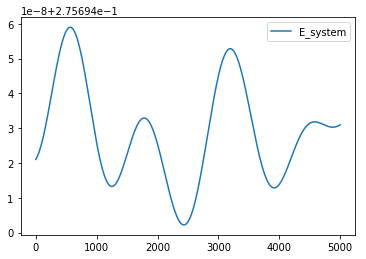

In [48]:
plt.plot(diagnostic['E_system'],label='E_system',)
plt.legend()

In [49]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

## potentiel de Harmonique sans exitation thermique

In [50]:
k_spring = 1.
r_m = 1.
masse = 1.
dt = 0.001

T = 0
epsilon = 0.

positions_initiales = faire_une_chaine_lineaire(10,r_m-0.1)
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(.01),size=positions_initiales.shape)

In [51]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

L'énergie du système est-elle conservée ?

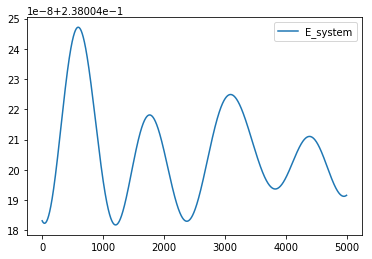

In [52]:
plt.plot(diagnostic['E_system'],label='E_system',)
plt.legend()

In [53]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

## Avec l'effet de la temperature

In [64]:
k_spring = 1.
epsilon = 1.
r_m = 1.
masse = 1.
dt = 0.001
T = 1.

positions_initiales = faire_une_chaine_lineaire(10,r_m-0.1)
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(.01),size=positions_initiales.shape)

In [65]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

L'énergie du système est-elle conservée ?

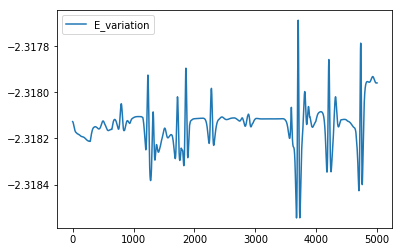

In [66]:
plt.plot(diagnostic['E_variation'],label='E_variation',)
plt.legend()

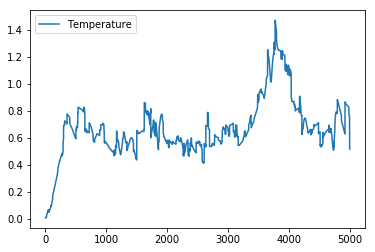

In [67]:
plt.plot(diagnostic['Temperature'],label='Temperature',)
plt.legend()

In [69]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

# Simule la transition entre l'etat globulaire et l'etat elonge

In [70]:
from Exercise_functions import simulateur_NVT_efficace

In [84]:
epsilon = 1.
r_m = 1.
mass = 1.
dt = 0.01
T = 6.

k_spring = 16.67 * epsilon / r_m**2

positions_initiales = faire_une_chaine_circulaire(100,r_m)
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(.1),size=positions_initiales.shape)

In [87]:
pos,vel,diagnostic = simulateur_NVT_efficace(positions_initiales,vitesses_initiales,mass=mass,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,Nstep=50000,dt=dt,enregistrement_stride=10)

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

In [88]:
visualiser_trajectoire(pos,1)

NGLWidget(count=5000)

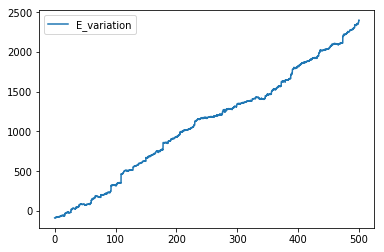

In [89]:
plt.plot(diagnostic['time'],diagnostic['E_variation'],label='E_variation',)
plt.legend()

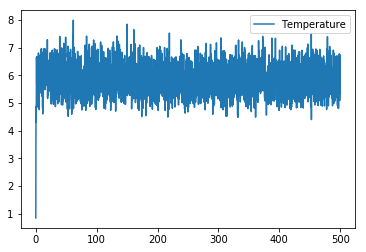

In [90]:
plt.plot(diagnostic['time'],diagnostic['Temperature'],label='Temperature',)
plt.legend()

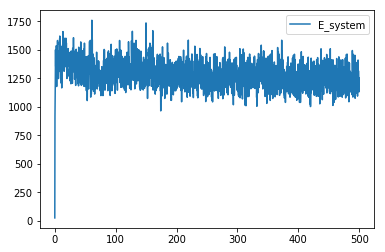

In [91]:
plt.plot(diagnostic['time'],diagnostic['E_system'],label='E_system',)
plt.legend()